In [50]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

In [51]:
df = pd.read_csv('../datasets/UCI_Credit_Card.csv')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [53]:
X = df.drop(['ID','default.payment.next.month'], axis=1)

In [54]:
y = df['default.payment.next.month']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=45, test_size=0.2, stratify= y)

In [56]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [57]:
params = {
    'max_depth': 4,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree':0.8,
    'random_state': 45,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

In [58]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round = 400,
    evals = [(dtest, 'test')],
    early_stopping_rounds=30,
    verbose_eval = False,
)

In [59]:
y_pred = model.predict(dtest)

In [61]:
y_pred

array([0.26581603, 0.3982151 , 0.81129235, ..., 0.0432196 , 0.1351422 ,
       0.11429778], shape=(6000,), dtype=float32)

In [60]:
print("ROC:",roc_auc_score(y_test, y_pred))

ROC: 0.7860467167687646


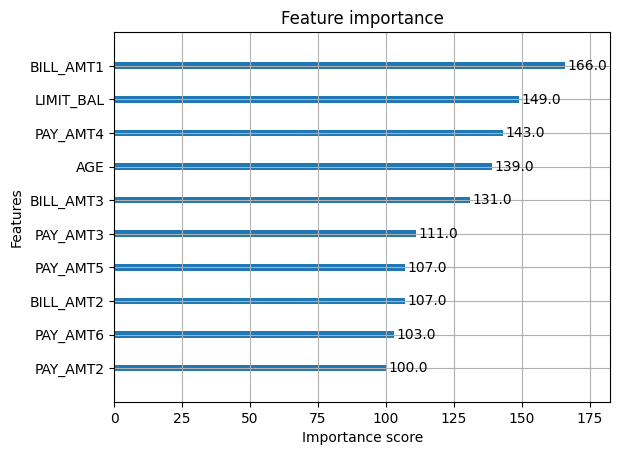

In [62]:
import matplotlib.pyplot as plt 
xgb.plot_importance(model, max_num_features=10, importance_type='weight')
plt.show()